In [35]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")

# Read the Data 

# Processing

### 1- Data understanding

In [36]:
df = pd.read_csv("AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


- **Drop un-neccessary columns**

In [37]:
cols_to_drop = "id name host_id host_name latitude longitude".split()
df.drop(cols_to_drop, axis=1, inplace=True)

- **Rearange columns**

In [38]:
columns = df.columns.tolist()
columns.pop(columns.index("price"))
columns.append("price")
df = df[columns]

In [39]:
df.head()

,neighbourhood_group,neighbourhood,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
0,Brooklyn,Kensington,Private room,1,9,0.21,6,365,149
1,Manhattan,Midtown,Entire home/apt,1,45,0.38,2,355,225
2,Manhattan,Harlem,Private room,3,0,NaN,1,365,150
3,Brooklyn,Clinton Hill,Entire home/apt,1,270,4.64,1,194,89
4,Manhattan,East Harlem,Entire home/apt,10,9,0.10,1,0,80


### 2- Dtypes

- **Check for Dtypes**

In [40]:
dtypes = df.dtypes
n_uniq = df.nunique()
pd.DataFrame({"Dtypes": dtypes, "N_Uniq": n_uniq}).T

,neighbourhood_group,neighbourhood,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
Dtypes,object,object,object,int64,int64,float64,int64,int64,int64
N_Uniq,5,221,3,109,394,937,47,366,674


- **Modify Datatypes**

In [41]:
cat_cols = "neighbourhood_group neighbourhood room_type".split()
df[cat_cols] = df[cat_cols].astype("category")

- **Check after modification**

In [42]:
dtypes = df.dtypes
n_uniq = df.nunique()
pd.DataFrame({"Dtypes": dtypes, "N_Uniq": n_uniq}).T

,neighbourhood_group,neighbourhood,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
Dtypes,category,category,category,int64,int64,float64,int64,int64,int64
N_Uniq,5,221,3,109,394,937,47,366,674


### 3- Null values

- **Check for null values**

In [43]:
null = df.isnull().sum()
null_ratio = null / df.shape[0]
dtypes = df.dtypes
pd.DataFrame({"Null_sum": null, "Null_ratio": null_ratio, "Dtpyes": dtypes}).T

,neighbourhood_group,neighbourhood,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
Null_sum,0,0,0,0,0,10052,0,0,0
Null_ratio,0,0,0,0,0,0.205583,0,0,0
Dtpyes,category,category,category,int64,int64,float64,int64,int64,int64


- **Check for distribution of reviews_per_month**
- **Then, Replace with median**

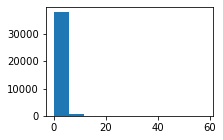

In [44]:
plt.figure(figsize=(3, 2))
plt.hist(df.reviews_per_month)
plt.show()

In [45]:
median = df.reviews_per_month.median()
# df.reviews_per_month.replace(np.nan, median, inplace=True)
df.reviews_per_month.fillna(median, inplace=True)

- **Check after handling null values**

In [46]:
null = df.isnull().sum()
null_ratio = null / df.shape[0]
dtypes = df.dtypes
pd.DataFrame({"Null_sum": null, "Null_ratio": null_ratio, "Dtpyes": dtypes}).T

,neighbourhood_group,neighbourhood,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
Null_sum,0,0,0,0,0,0,0,0,0
Null_ratio,0,0,0,0,0,0,0,0,0
Dtpyes,category,category,category,int64,int64,float64,int64,int64,int64


### 4- Outliers

In [47]:
num_cols = df.select_dtypes("number").columns
num_cols

Index(['minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'price'],
      dtype='object')

- **Check for outliers**

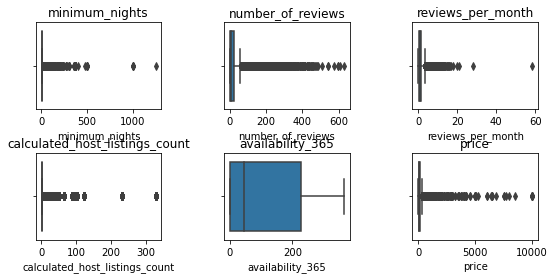

In [48]:
plt.figure(figsize=(9, 4))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    plt.title(col)
    sns.boxplot(df[col], orient="h")
plt.subplots_adjust(hspace=.5, wspace=.5)
plt.show()

- **Handle Outliers**

In [49]:
for col in num_cols[:-1]:
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IQR = Q3 - Q1
    Upper = Q3 + 1.5 * IQR
    Lower = Q1 - 1.5 * IQR
    Upper_outliers = df[df[col] > Upper][col].values
    Lower_outliers = df[df[col] < Lower][col].values
    df[col].replace(Upper_outliers, Upper, inplace=True)
    df[col].replace(Lower_outliers, Lower, inplace=True)

- **Check after handling outliers**

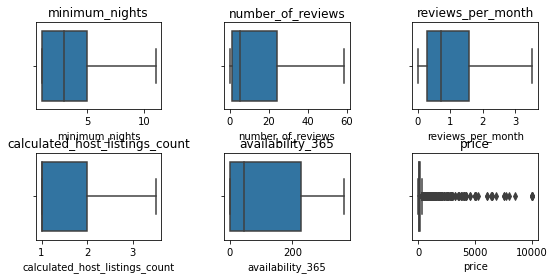

In [50]:
plt.figure(figsize=(9, 4))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    plt.title(col)
    sns.boxplot(df[col], orient="h")
plt.subplots_adjust(hspace=.5, wspace=.5)
plt.show()

### 5- Visualization

- **Check for Variatoin**

In [51]:
num_cols = df.select_dtypes("number").columns
cat_cols = df.select_dtypes("category").columns

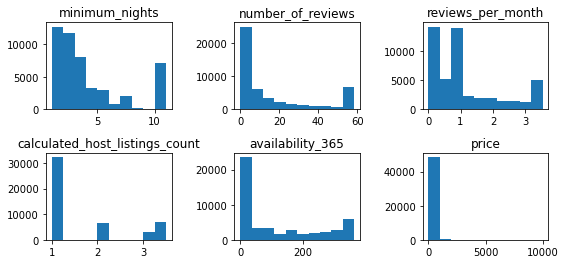

In [52]:
plt.figure(figsize=(9, 4))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    plt.hist(df[col])
    plt.title(col)
plt.subplots_adjust(hspace=.5, wspace=.5)
plt.show()

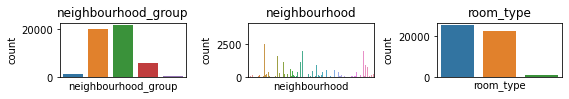

In [53]:
plt.figure(figsize=(9, 1))
for i, col in enumerate(cat_cols):
    plt.subplot(1, 3, i+1)
    sns.countplot(x=col, data=df)
    plt.title(col)
    plt.xticks([], [])
plt.subplots_adjust(hspace=.5, wspace=.5)
plt.show()

- **Check for ralation between features & the target**

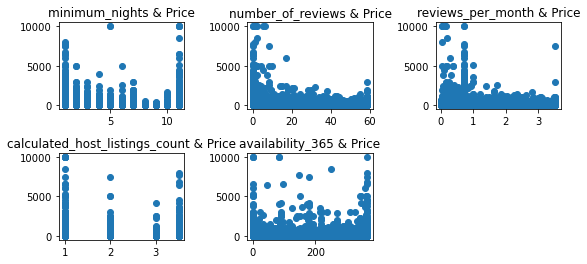

In [54]:
plt.figure(figsize=(9, 4))
for i, col in enumerate(num_cols[:-1]):
    plt.subplot(2, 3, i+1)
    plt.scatter(df[col], df["price"])
    plt.title(f"{col} & Price")
plt.subplots_adjust(hspace=.5, wspace=.5)
plt.show()

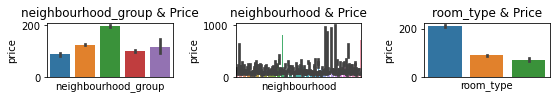

In [55]:
plt.figure(figsize=(9, 1))
for i, col in enumerate(cat_cols):
    plt.subplot(1, 3, i+1)
    sns.barplot(x=col, y="price", data=df)
    plt.title(f"{col} & Price")
    plt.xticks([], [])
plt.subplots_adjust(hspace=.5, wspace=.5)
plt.show()

- **Remove availability_365 column since it doesn't has relation with the target**

In [56]:
df.drop(["availability_365"], axis=1, inplace=True)

### 6- Duplicates

In [57]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

2619
0


### 7- Data Split

In [58]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1]
y = df.iloc[:, -1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, shuffle=True, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.1, shuffle=True, random_state=0)

### 8- Normalization

In [59]:
from sklearn.preprocessing import MinMaxScaler
num_cols = X_train.select_dtypes("number").columns
scaler = MinMaxScaler()
scaler.fit(X_train[num_cols])

X_train[num_cols] = scaler.transform(X_train[num_cols])
X_val[num_cols] = scaler.transform(X_val[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

### 9- Encoding

In [60]:
cat_cols = X_train.select_dtypes("category").columns
dtypes = X_train[cat_cols].nunique()
pd.DataFrame(dtypes).T

,neighbourhood_group,neighbourhood,room_type
0,5,219,3


- **Ordinal Encoding**

In [61]:
X_train.room_type = X_train.room_type.map({'Shared room': 1, 'Private room': 2, 'Entire home/apt': 3})
X_val.room_type = X_val.room_type.map({'Shared room': 1, 'Private room': 2, 'Entire home/apt': 3})
X_test.room_type = X_test.room_type.map({'Shared room': 1, 'Private room': 2, 'Entire home/apt': 3})

- **One hot encoding**

In [62]:
from category_encoders import OneHotEncoder
one_hot_encoder = OneHotEncoder(cols=["neighbourhood_group"])
one_hot_encoder.fit(X_train)

X_train = one_hot_encoder.transform(X_train)
X_val = one_hot_encoder.transform(X_val)
X_test = one_hot_encoder.transform(X_test)

- **Binary Encoder**

In [63]:
from category_encoders import BinaryEncoder
binary_encoder = BinaryEncoder(cols=["neighbourhood"])
binary_encoder.fit(X_train)

X_train = binary_encoder.transform(X_train)
X_val = binary_encoder.transform(X_val)
X_test = binary_encoder.transform(X_test)

# Linear Regression Model

- **Training**

In [64]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

- **Evaluation**

In [69]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [70]:
y_pred_train = lr_model.predict(X_train)
tr_err = mean_absolute_error(y_train, y_pred_train)

In [71]:
y_pred_val = lr_model.predict(X_val)
val_err = mean_absolute_error(y_val, y_pred_val)

In [72]:
print(tr_err)
print(val_err)

77.87677691112911
72.56829500945435


# Polynomial Regression model

In [73]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(4)
poly.fit(X_train)

X_train_poly = poly.transform(X_train)
X_val_poly = poly.transform(X_val)
X_test_poly = poly.transform(X_test)

In [74]:
from sklearn.linear_model import LinearRegression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

LinearRegression()

In [75]:
y_train_pred = poly_model.predict(X_train_poly)
y_val_pred = poly_model.predict(X_val_poly)

In [76]:
tr_err = mean_absolute_error(y_train, y_train_pred)
val_err = mean_absolute_error(y_val, y_val_pred)
print(tr_err)
print(val_err)

75.98373773420148
3498131944.035032


# Decision Tree Model

In [78]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
#In regression, we evvalyate the mnodel using the error

In [80]:
dt_model.fit(X_train , y_train)

DecisionTreeRegressor()

### Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error

In [85]:
y_train_pred = dt_model.predict(X_train)
mean_absolute_error(y_train , y_train_pred)

20.886052017432103

In [86]:
y_val_pred = dt_model.predict(X_val)
mean_absolute_error(y_val , y_val_pred)

89.67682914620866

### Train error is low and validation error is high which means that the model is an overfit. I must decrease overfitting. I can do this by decreasing model complexity. I can do this in regression models using regularizawtion. In DT models, I do it using pruning. 
### Pruning techniques are stated below:

### 1. Complexity depends on model size which translates to # of parameter in linear/polynomial regression and to tree size in DT model. To control complexity in a DT model, limit the the # of levels or the depth of the model. Depth of a model i a hypermarameter. 

### 2. I can also set a min variation for the model to reach and then stops 

### 3. I can choose only X featurees to split using

### 4. I can set a minimum # of samples that if reached, the model cant split

### I should try out many different options on the model to yield the best outcome. The options are in the cell below: 

In [108]:
#ill set a max depth now, keep on trying different depths untill I reach a good fit 
#theres a chance ill never reach a good fit. Regreszsion models are sometimes ike this as variation in data is v high
dt_model = DecisionTreeRegressor(max_depth=3)
# dt_model = DecisionTreeRegressor(min_samples_split= 30) -> After split, lease nodes per branch
#dt_model = DecisionTreeRegressor(min_impurity_decrease= 20) -> least value to decreasing the variance is 20, if this split will only decrease the variance by 18, then dont slpit. if 22, then split.  

In [109]:
dt_model.fit(X_train , y_train)

DecisionTreeRegressor(max_depth=3)

### Evaluation

In [110]:
from sklearn.metrics import mean_absolute_error

In [111]:
y_train_pred = dt_model.predict(X_train)
mean_absolute_error(y_train , y_train_pred)

75.76787690817048

In [112]:
y_val_pred = dt_model.predict(X_val)
mean_absolute_error(y_val , y_val_pred)

70.13434688061332

### Visualizing using TSNE

In [118]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=1)
#I only did the dimenstionality reduction on the first 1000 sample to speed things up
#This is inly a proof of concept. We should do it on all the data.
X_tsne = tsne.fit_transform(X_train.iloc[:1000])

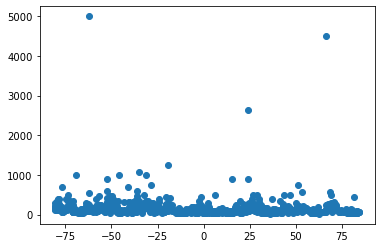

In [121]:
plt.scatter(X_tsne , y_train.iloc[:1000])

### Analysis of the scatter plot^
on the x-axis we can see all the features reduced to one dimension "x"
the data is very bad: 
1. no relation between x and y 
2. data (x) isnt clustered or seperable or anything 